In [17]:
using Pkg; Pkg.activate(".")
using Statistics
using PyPlot
using Glob
using DelimitedFiles
using MUST

MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" 
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" EOS 
MUST.@get_help visual
pl = pyimport("matplotlib.pylab");

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


In [18]:
solar_model = readdlm("solar_model.txt");

In [19]:
folders = glob("grid*/", MUST.@in_dispatch("data"));

In [20]:
#all_models = MUST.Boxes.(folders[1:3:end]);
all_models = first.([MUST.Boxes(MUST.@in_dispatch("data/p663")), MUST.Boxes(MUST.@in_dispatch("data/p884")), MUST.Boxes(MUST.@in_dispatch("data/p10105")), MUST.Boxes(MUST.@in_dispatch("data/p12126"))]);
#all_models = first.([MUST.Boxes(MUST.@in_dispatch("data/p10105")), MUST.Boxes(MUST.@in_dispatch("data/p10105x30")), MUST.Boxes(MUST.@in_dispatch("data/p12126"))]);

In [21]:
model_names     = ["(6x6x3)x24", "(8x8x4)x24", "(10x10x5)x24","(12x12x6)x24"]
snapshot_number = length.(all_models) .-2
cols            = ["r", "k", "c", "m"];

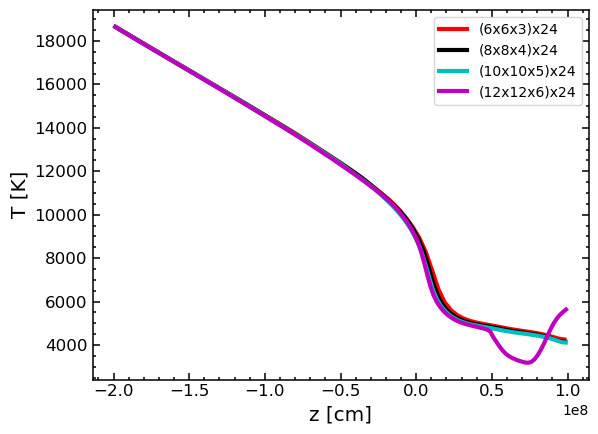

In [22]:
close("all")
f, ax = plt.subplots(1,1)
basic_plot!(ax)

for (i,models) in enumerate(all_models)
    
    snap = snapshot_number[i]
    y    = MUST.plane_statistic(mean, models[snap], :T)
    x    = MUST.axis(models[snap], :z)

    ax.plot(x, y, label=model_names[i], lw=3, color=cols[i])

end

ax.legend()
ax.set_xlabel("z [cm]", fontsize="x-large")
ax.set_ylabel("T [K]", fontsize="x-large")
gcf()

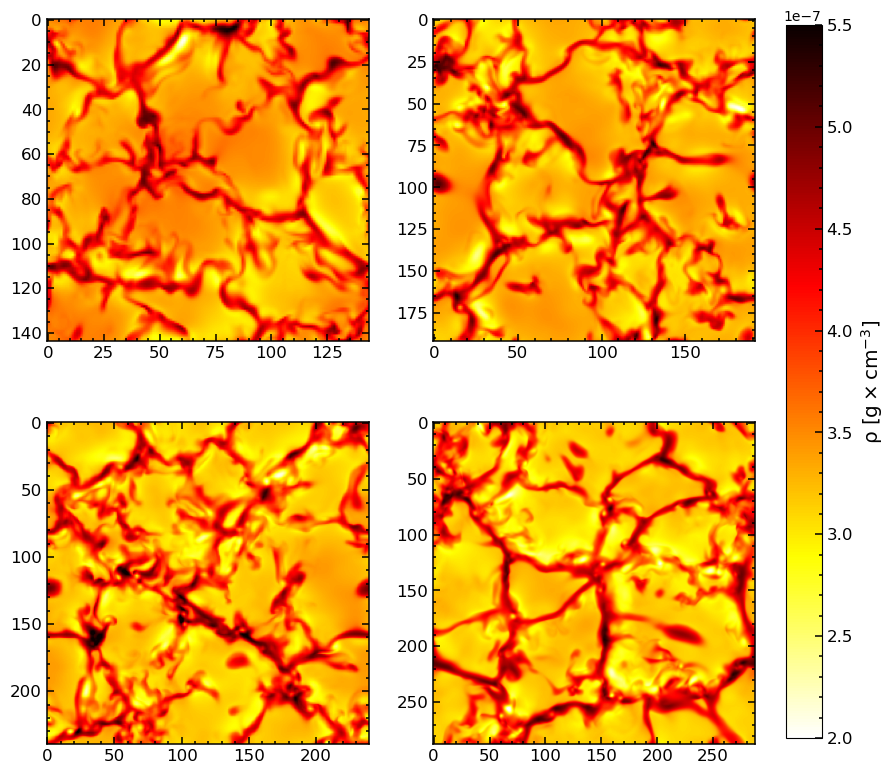

In [23]:
close("all")
f, ax = plt.subplots(2,2, figsize=(10,10))
basic_plot!.(ax)

plt.subplots_adjust(wspace=0.2, hspace=0.1)

c = 1
for row in axes(ax, 1)
    for col in axes(ax, 2)

        snap  = all_models[c][snapshot_number[c]]
        z     = MUST.axis(snap, :z)
        plane = argmin(abs.(z .- 0.0e8))
        im = ax[row, col].imshow(snap[:d][:,:,plane], cmap="hot_r", vmin=2e-7, vmax=5.5e-7)
        
        if c==1 
            cax = add_cbar(im, ax)
            cax.set_label(L"\rm \rho \ [g \times cm^{-3}]", fontsize="x-large")
        end

        c += 1
    end
end

gcf()